In [5]:
from qiskit import Aer, QuantumCircuit
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
qc = QuantumCircuit(8)
qc.h(range(8))
qc.measure_all()
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=100000, memory=True).result()
counts = result.get_counts()
memory = result.get_memory()

In [28]:
countstemp = {int(x, 2): counts[x] for x in counts.keys()}

{94: 376,
 176: 402,
 130: 398,
 75: 405,
 119: 404,
 60: 388,
 36: 384,
 143: 455,
 81: 376,
 189: 349,
 165: 373,
 1: 420,
 168: 401,
 155: 371,
 52: 397,
 44: 455,
 227: 402,
 202: 372,
 113: 403,
 77: 360,
 62: 391,
 34: 381,
 247: 419,
 163: 382,
 19: 392,
 237: 423,
 198: 408,
 114: 380,
 51: 434,
 45: 400,
 193: 395,
 236: 372,
 37: 362,
 59: 419,
 148: 415,
 194: 392,
 211: 408,
 107: 379,
 23: 418,
 29: 401,
 178: 423,
 131: 360,
 180: 378,
 90: 394,
 110: 343,
 22: 432,
 185: 407,
 156: 410,
 68: 371,
 122: 392,
 179: 404,
 95: 367,
 214: 350,
 199: 406,
 238: 380,
 182: 387,
 92: 377,
 132: 401,
 249: 369,
 80: 392,
 190: 372,
 253: 403,
 184: 409,
 106: 391,
 73: 395,
 12: 411,
 61: 392,
 35: 400,
 112: 370,
 78: 389,
 232: 389,
 183: 382,
 91: 408,
 174: 402,
 224: 421,
 203: 405,
 50: 367,
 46: 411,
 175: 383,
 135: 409,
 27: 408,
 103: 425,
 109: 407,
 160: 404,
 9: 383,
 136: 392,
 162: 404,
 186: 381,
 84: 362,
 33: 408,
 63: 383,
 166: 379,
 140: 373,
 220: 386,
 187:

In [37]:
df1_data = {"number": [int(x, 2) for x in counts.keys()], "counts": [x for x in counts.values()]}
df1 = pd.DataFrame.from_dict(df1_data)

In [48]:
kolomogorov_counts = df1['counts'].to_list()
kolomogorov_counts.sort()
kolomogorov_counts

[339,
 341,
 343,
 349,
 349,
 350,
 352,
 353,
 353,
 356,
 358,
 360,
 360,
 361,
 361,
 362,
 362,
 362,
 364,
 364,
 364,
 365,
 366,
 366,
 366,
 366,
 367,
 367,
 367,
 367,
 368,
 369,
 370,
 370,
 371,
 371,
 371,
 371,
 372,
 372,
 372,
 372,
 372,
 373,
 373,
 373,
 373,
 373,
 374,
 374,
 374,
 375,
 375,
 375,
 376,
 376,
 376,
 376,
 376,
 376,
 376,
 377,
 377,
 377,
 377,
 378,
 378,
 378,
 378,
 378,
 378,
 379,
 379,
 379,
 379,
 379,
 379,
 380,
 380,
 380,
 380,
 380,
 381,
 381,
 381,
 381,
 381,
 381,
 382,
 382,
 382,
 382,
 382,
 383,
 383,
 383,
 384,
 384,
 384,
 384,
 385,
 385,
 385,
 386,
 386,
 386,
 386,
 386,
 387,
 387,
 388,
 388,
 388,
 389,
 389,
 389,
 389,
 389,
 389,
 390,
 390,
 390,
 390,
 390,
 390,
 391,
 391,
 391,
 391,
 391,
 392,
 392,
 392,
 392,
 392,
 392,
 392,
 392,
 393,
 393,
 394,
 394,
 394,
 394,
 395,
 395,
 395,
 395,
 396,
 397,
 397,
 397,
 397,
 397,
 397,
 397,
 397,
 398,
 398,
 398,
 398,
 399,
 399,
 399,
 399,
 399,
 400

In [53]:
D_plus = []
D_minus = []
N = len(kolomogorov_counts)
for i in range(1, N + 1):
    x = i / N - kolomogorov_counts[i-1]
    D_plus.append(x)

for i in range(1, N + 1):
    y =(i-1)/N
    y =kolomogorov_counts[i-1]-y
    D_minus.append(y)
    
D_plus_max = max(D_plus)
D_minus_max = max(D_minus)
ans = max(D_plus_max, D_minus_max)
ans

454.0078125

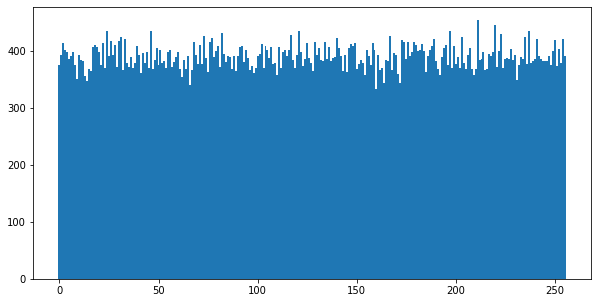

In [5]:
plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=1)
plt.show()

In [34]:
#x = stats.kstest(list(counts.values()), 'norm')
x = stats.kstest(stats.norm.rvs(size=len(counts.values()), random_state=list(counts.values())), stats.norm.cdf)

ValueError: [380, 382, 380, 392, 391, 380, 383, 373, 393, 350, 386, 380, 426, 387, 425, 370, 405, 368, 422, 384, 393, 393, 416, 403, 384, 425, 358, 409, 398, 424, 406, 404, 411, 374, 370, 397, 424, 435, 417, 385, 403, 391, 415, 369, 394, 379, 399, 395, 369, 379, 410, 398, 401, 392, 370, 390, 347, 409, 390, 377, 368, 375, 382, 371, 390, 398, 430, 376, 397, 426, 344, 383, 407, 417, 388, 408, 412, 366, 372, 421, 404, 432, 374, 369, 388, 360, 375, 370, 386, 418, 385, 378, 394, 375, 370, 436, 410, 403, 386, 377, 413, 391, 354, 379, 398, 385, 382, 367, 379, 394, 394, 367, 382, 410, 378, 392, 394, 379, 381, 402, 388, 395, 371, 455, 358, 361, 351, 333, 399, 384, 417, 436, 393, 406, 383, 411, 387, 401, 411, 391, 378, 387, 436, 367, 363, 370, 393, 392, 416, 399, 371, 381, 392, 375, 403, 388, 416, 405, 392, 399, 379, 399, 390, 422, 393, 388, 390, 374, 422, 391, 410, 418, 415, 381, 392, 425, 414, 383, 344, 415, 399, 416, 356, 367, 373, 373, 386, 405, 446, 389, 410, 414, 369, 388, 382, 407, 406, 371, 403, 390, 387, 386, 436, 375, 369, 375, 411, 403, 368, 363, 359, 362, 367, 371, 419, 392, 373, 369, 403, 401, 400, 403, 395, 384, 402, 419, 368, 366, 377, 389, 394, 398, 412, 391, 411, 363, 359, 428, 341, 371, 408, 366, 407, 387, 367, 400, 366, 392, 376, 402, 384, 385, 392, 382, 407, 368] cannot be used to seed a numpy.random.RandomState instance

In [48]:
numbers = [int(x, 2) for x in memory]
numbers_norm = [x / 256 for x in numbers]
x = stats.kstest(numbers, 'uniform')
x

KstestResult(statistic=0.99617, pvalue=0.0)

In [3]:
countstemp = {int(x, 2): counts[x] for x in counts.keys()}

In [9]:
#x = np.linspace(min(countstemp.values()), max(countstemp.values()), len(countstemp.values()))
x = np.random.uniform(min(countstemp.values()), max(countstemp.values()), len(countstemp.values()))
test = stats.kstest(list(countstemp.values()), x)

In [11]:
test

KstestResult(statistic=0.296875, pvalue=2.360504702132584e-10)